In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from dfply import *
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Analyse + fix missing values

data = pd.read_csv('prepared_data.csv', sep='\t', index_col=0)
print(data.isna().sum())
pd.set_option('use_inf_as_na',True)
data = data.dropna(how='any')

print(data.isna().sum())

error_rate           0
avg_char_duration    0
screen_size          0
swipe_finger         1
dtype: int64
error_rate           0
avg_char_duration    0
screen_size          0
swipe_finger         0
dtype: int64
error_rate           0
avg_char_duration    0
screen_size          0
swipe_finger         1
dtype: int64
error_rate           0
avg_char_duration    0
screen_size          0
swipe_finger         0
dtype: int64


<AxesSubplot:title={'center':'frequencies screen surface'}>

<AxesSubplot:title={'center':'frequencies screen surface'}>

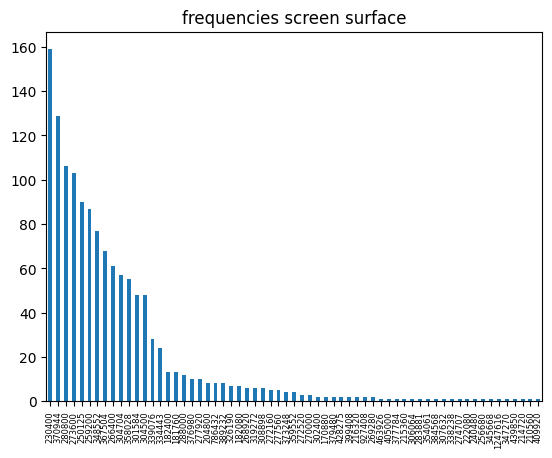

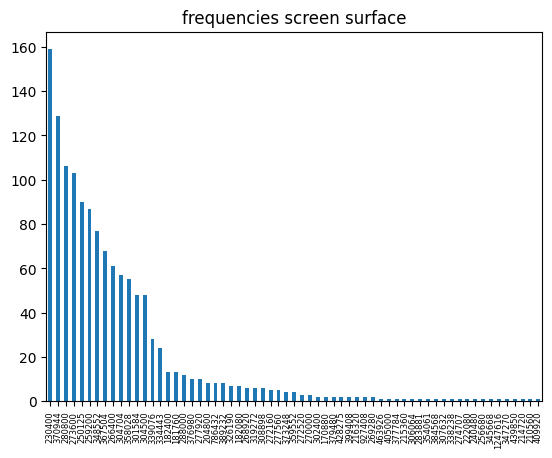

In [3]:
# show distibution of freuquencies of screen surfaces
size = data["screen_size"]
fig, ax = plt.subplots()
plt.title("frequencies screen surface")
plt.xticks(fontsize=6)
data['screen_size'].value_counts().plot(ax=ax, kind='bar')

***Analyse Outliers***

In [4]:
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers
find_outliers_IQR(data['screen_size'])

uid
0v1dljhskkp96ljbongsf95mm2     927408
6jfstctlbeba7felvi99mbjg98     786432
78inknvjp2cjp3gmbfms0u9dlt     786432
7bv31t3k9b425a8nnvik05558c     786432
8d1sgb789q9uteu6ac8lrpkf9a     927408
8i24ds4t3bo0g6ng6la8kklf6o    1247616
8s6ud2pbh0d8k6cudsr2ub2otg     786432
9v10oe3mb5dce5bcsc6aco16l0     786432
cr8e9djnor2v9p9udb6t3akmlv     786432
m19kp6kv22lnksntjptpuusbqj     786432
pl69ut44cbvmffdk3c18f19ptp     786432
Name: screen_size, dtype: int64

uid
0v1dljhskkp96ljbongsf95mm2     927408
6jfstctlbeba7felvi99mbjg98     786432
78inknvjp2cjp3gmbfms0u9dlt     786432
7bv31t3k9b425a8nnvik05558c     786432
8d1sgb789q9uteu6ac8lrpkf9a     927408
8i24ds4t3bo0g6ng6la8kklf6o    1247616
8s6ud2pbh0d8k6cudsr2ub2otg     786432
9v10oe3mb5dce5bcsc6aco16l0     786432
cr8e9djnor2v9p9udb6t3akmlv     786432
m19kp6kv22lnksntjptpuusbqj     786432
pl69ut44cbvmffdk3c18f19ptp     786432
Name: screen_size, dtype: int64

In [5]:
find_outliers_IQR(data['avg_char_duration']).sort_values()

uid
lvf3et9qkfngfqjsdrie8oamlt    1.043808e+03
f8e67an8t8fs79abdiba72hbev    1.063494e+03
hh4bv0fg35l2e0i595rl29juip    1.070497e+03
hjgq6ugun93f0v756jc8h1jec6    1.091280e+03
gnu23tgarn4o8dmr3mee1bgksv    1.105661e+03
                                  ...     
ctimcfb2lmrrn5s24994682vma    1.936015e+05
audc7tlc2ck4m6n09pkc46rvgj    2.238747e+05
ir8jqislt00b04b3lmb7v1g6rj    2.330918e+05
0069j4rbe1si9pjqgfhks8sprm    4.512703e+05
mmv95ln59eb47o26drldkjc82d    6.901384e+06
Name: avg_char_duration, Length: 209, dtype: float64

uid
lvf3et9qkfngfqjsdrie8oamlt    1.043808e+03
f8e67an8t8fs79abdiba72hbev    1.063494e+03
hh4bv0fg35l2e0i595rl29juip    1.070497e+03
hjgq6ugun93f0v756jc8h1jec6    1.091280e+03
gnu23tgarn4o8dmr3mee1bgksv    1.105661e+03
                                  ...     
ctimcfb2lmrrn5s24994682vma    1.936015e+05
audc7tlc2ck4m6n09pkc46rvgj    2.238747e+05
ir8jqislt00b04b3lmb7v1g6rj    2.330918e+05
0069j4rbe1si9pjqgfhks8sprm    4.512703e+05
mmv95ln59eb47o26drldkjc82d    6.901384e+06
Name: avg_char_duration, Length: 209, dtype: float64

In [6]:

find_outliers_IQR(data['error_rate']).sort_values()

uid
5p36qvohrubi0glbfa2sps6kev     0.538462
gnu23tgarn4o8dmr3mee1bgksv     0.545455
crrtpk003307cb809eiujdnr97     0.545455
ohk3ohneptdg0sob2djh7e1p19     0.545455
2lssnjt9tnkadurns46bvtf268     0.550000
                                ...    
voqrtbk1p57i27u59n5hnkqju6    20.900000
bi6vbeqsnhn16ln94rqe97om1o    27.000000
88p5pbhel0gq0j4faqc66412l7    27.000000
qgr0mcjh3t7bep6c6sac88g967    28.250000
9o4j6ek6puc2nsuur5rclkb21c    36.000000
Name: error_rate, Length: 123, dtype: float64

uid
5p36qvohrubi0glbfa2sps6kev     0.538462
gnu23tgarn4o8dmr3mee1bgksv     0.545455
crrtpk003307cb809eiujdnr97     0.545455
ohk3ohneptdg0sob2djh7e1p19     0.545455
2lssnjt9tnkadurns46bvtf268     0.550000
                                ...    
voqrtbk1p57i27u59n5hnkqju6    20.900000
bi6vbeqsnhn16ln94rqe97om1o    27.000000
88p5pbhel0gq0j4faqc66412l7    27.000000
qgr0mcjh3t7bep6c6sac88g967    28.250000
9o4j6ek6puc2nsuur5rclkb21c    36.000000
Name: error_rate, Length: 123, dtype: float64

### ***Graphs of means for both Independent variables***

***Graphs for mean error rate by swipe_finger***

In [7]:
data['swipe_finger'].unique()


array(['Thumb', 'Index', 'Other'], dtype=object)

array(['Thumb', 'Index', 'Other'], dtype=object)

In [8]:
# Average error rate of used fingers for typing
thumb_error = data[data['swipe_finger'] == "Thumb"]['error_rate'].mean()
thumb_error_sd = data[data['swipe_finger'] == "Thumb"]['error_rate'].std()

index_error = data[data['swipe_finger'] == "Index"]['error_rate'].mean()
index_error_sd = data[data['swipe_finger'] == "Index"]['error_rate'].std()

other_error = data[data['swipe_finger'] == "Other"]['error_rate'].mean()
other_error_sd = data[data['swipe_finger'] == "Other"]['error_rate'].std()

print("Mean error rate of thumb is:", thumb_error)
print("Mean error rate of index is:", index_error)
print("Mean error rate of other fingers is:", other_error)

Mean error rate of thumb is: 0.48722870121796175
Mean error rate of index is: 0.47651045811655673
Mean error rate of other fingers is: 0.33246719006639697
Mean error rate of thumb is: 0.48722870121796175
Mean error rate of index is: 0.47651045811655673
Mean error rate of other fingers is: 0.33246719006639697


Text(0.5, 0.98, 'Different plotting styles of mean error rate by finger used')

Text(0.5, 0.98, 'Different plotting styles of mean error rate by finger used')

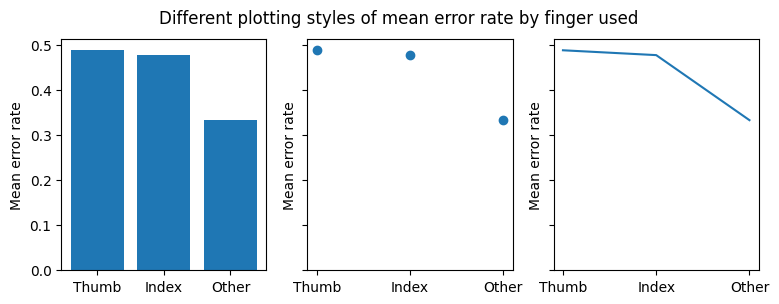

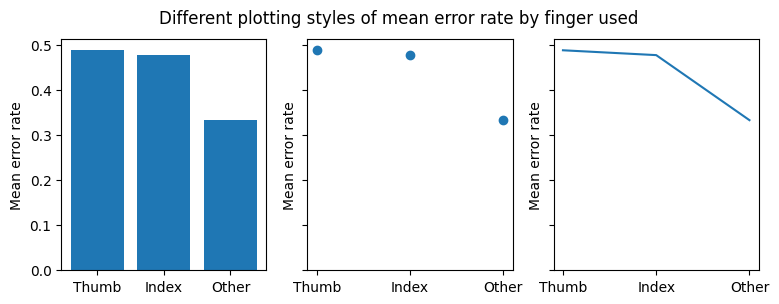

In [9]:
names = ["Thumb", "Index", "Other"]
values = [thumb_error, index_error, other_error]
sd = [thumb_error_sd, index_error_sd, other_error_sd]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax1.bar(names, values)
ax1.set_ylabel("Mean error rate")

ax2.scatter(names, values)
ax2.set_ylabel("Mean error rate")

ax3.plot(names, values)
ax3.set_ylabel("Mean error rate")

fig.suptitle('Different plotting styles of mean error rate by finger used')

***Graphs for mean avg_char_duration by swipe finger***

In [10]:
# Average error rate of used fingers for typing
thumb_duration = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].mean()
thumb_duration_sd = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].std()

index_duration = data[data['swipe_finger'] == "Index"]['avg_char_duration'].mean()
index_duration_sd = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].std()

other_duration = data[data['swipe_finger'] == "Other"]['avg_char_duration'].mean()
other_duration_sd = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].std()

print("Average character duration of thumb is:", thumb_duration)
print("Average character duration of index is:", index_duration)
print("Average character duration of other fingers is:", other_duration)

Average character duration of thumb is: 10073.334088895417
Average character duration of index is: 2726.3631182259246
Average character duration of other fingers is: 4367.352348872661
Average character duration of thumb is: 10073.334088895417
Average character duration of index is: 2726.3631182259246
Average character duration of other fingers is: 4367.352348872661


Text(0.5, 0.98, 'Different plotting styles of mean duration per character by finger used')

Text(0.5, 0.98, 'Different plotting styles of mean duration per character by finger used')

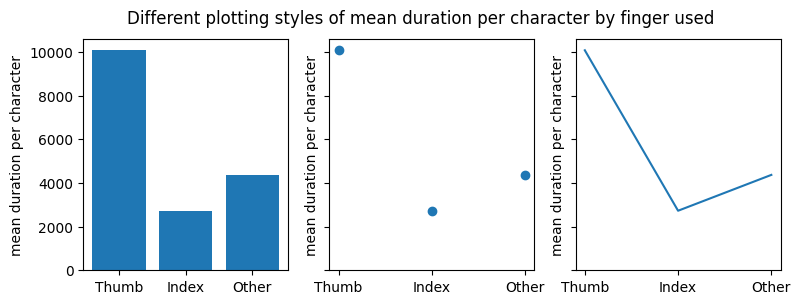

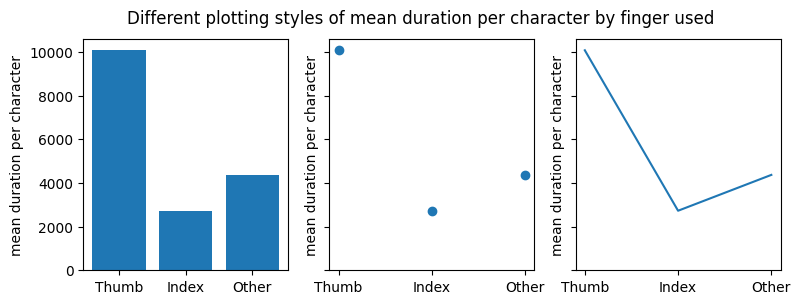

In [11]:
names = ["Thumb", "Index", "Other"]
values = [thumb_duration, index_duration, other_duration]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax1.bar(names, values)
ax1.set_ylabel("mean duration per character")

ax2.scatter(names, values)
ax2.set_ylabel("mean duration per character")

ax3.plot(names, values)
ax3.set_ylabel("mean duration per character")

fig.suptitle('Different plotting styles of mean duration per character by finger used')

***Graphs for mean error_rate by screen_size***

In [12]:
# Sort dataframe by screen surface values
size_sorted = data.sort_values(by=['screen_size'])

# Split in three equal groups
splitted_sizes = np.array_split(size_sorted, 3)

screen_size_small = splitted_sizes[0]
screen_size_middle = splitted_sizes[1]
screen_size_big = splitted_sizes[2]

In [13]:
# Average error rate and standart deviation three screen size categories (including mean screen size of category)
small_screen_error = screen_size_small['error_rate'].mean()
small_screen_error_sd = screen_size_small['error_rate'].std()
mean_screen_size_small = screen_size_small['screen_size'].mean()

middle_screen_error = screen_size_middle['error_rate'].mean()
middle_screen_error_sd = screen_size_middle['error_rate'].std()
mean_screen_size_middle = screen_size_middle['screen_size'].mean()

big_screen_error = screen_size_big['error_rate'].mean()
big_screen_error_sd = screen_size_big['error_rate'].std()
mean_screen_size_big = screen_size_big['screen_size'].mean()

print("Mean error rate of small size screen surface category is:", small_screen_error, "With mean screen size of:", mean_screen_size_small)
print("Mean error rate of middle size screen surface category  is:", middle_screen_error, "With mean screen size of:", mean_screen_size_middle)
print("Mean error rate of big size screen surface category is:", big_screen_error, "With mean screen size of:", mean_screen_size_big)

Mean error rate of small size screen surface category is: 0.3723475038693634 With mean screen size of: 239930.2277904328
Mean error rate of middle size screen surface category  is: 0.6828774017074855 With mean screen size of: 287880.07762557076
Mean error rate of big size screen surface category is: 0.3714489256918966 With mean screen size of: 373714.53652968036
Mean error rate of small size screen surface category is: 0.3723475038693634 With mean screen size of: 239930.2277904328
Mean error rate of middle size screen surface category  is: 0.6828774017074855 With mean screen size of: 287880.07762557076
Mean error rate of big size screen surface category is: 0.3714489256918966 With mean screen size of: 373714.53652968036


Text(0.5, 0.98, 'Different plotting styles of mean error rate by screen size')

Text(0.5, 0.98, 'Different plotting styles of mean error rate by screen size')

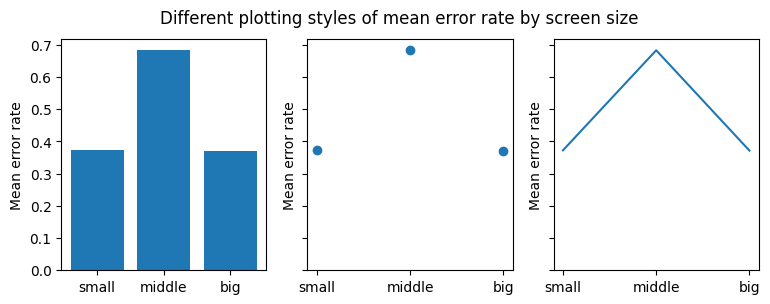

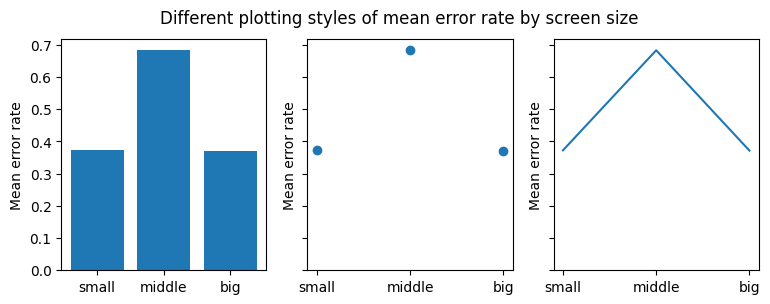

In [14]:
names = ["small", "middle", "big"]
values = [small_screen_error, middle_screen_error, big_screen_error]
sd = [small_screen_error_sd, middle_screen_error_sd, big_screen_error_sd]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax1.bar(names, values)
ax1.set_ylabel("Mean error rate")

ax2.scatter(names, values)
ax2.set_ylabel("Mean error rate")

ax3.plot(names, values)
ax3.set_ylabel("Mean error rate")

fig.suptitle('Different plotting styles of mean error rate by screen size')

***Graphs for mean avg_char_duration by screen_size***

In [15]:
# Average error rate and standart deviation three screen size categories (including mean screen size of category)
small_screen_char_duration = screen_size_small['avg_char_duration'].mean()
small_screen_char_duration_sd = screen_size_small['avg_char_duration'].std()
mean_screen_size_small = screen_size_small['screen_size'].mean()

middle_screen_char_duration = screen_size_middle['avg_char_duration'].mean()
middle_screen_char_duration_sd = screen_size_middle['avg_char_duration'].std()
mean_screen_size_middle = screen_size_middle['screen_size'].mean()

big_screen_char_duration = screen_size_big['avg_char_duration'].mean()
big_screen_char_duration_sd = screen_size_big['avg_char_duration'].std()
mean_screen_size_big = screen_size_big['screen_size'].mean()

print("The average character duration of small size screen surface category is:", small_screen_char_duration, "With mean screen size of:", mean_screen_size_small)
print("Mean error rate of middle size screen surface category  is:", middle_screen_char_duration, "With mean screen size of:", mean_screen_size_middle)
print("Mean error rate of big size screen surface category is:", big_screen_char_duration, "With mean screen size of:", mean_screen_size_big)

The average character duration of small size screen surface category is: 2071.697506001974 With mean screen size of: 239930.2277904328
Mean error rate of middle size screen surface category  is: 17228.671331013014 With mean screen size of: 287880.07762557076
Mean error rate of big size screen surface category is: 3717.210634606173 With mean screen size of: 373714.53652968036
The average character duration of small size screen surface category is: 2071.697506001974 With mean screen size of: 239930.2277904328
Mean error rate of middle size screen surface category  is: 17228.671331013014 With mean screen size of: 287880.07762557076
Mean error rate of big size screen surface category is: 3717.210634606173 With mean screen size of: 373714.53652968036


Text(0.5, 0.98, 'Different plotting styles of mean duration per character by screen size')

Text(0.5, 0.98, 'Different plotting styles of mean duration per character by screen size')

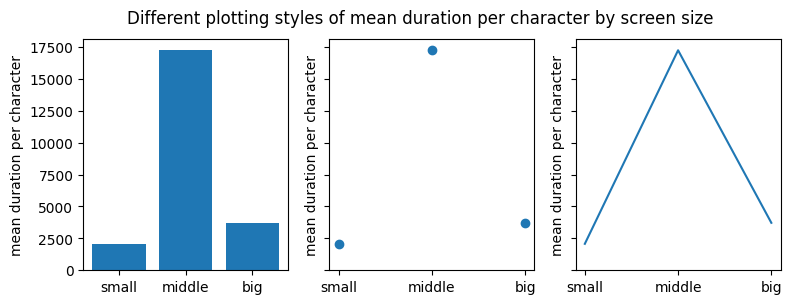

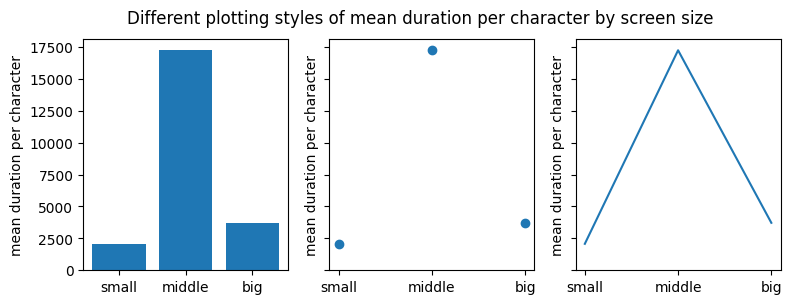

In [16]:
names = ["small", "middle", "big"]
values = [small_screen_char_duration, middle_screen_char_duration, big_screen_char_duration]
sd = [small_screen_char_duration_sd, middle_screen_char_duration_sd, big_screen_char_duration_sd]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax1.bar(names, values)
ax1.set_ylabel("mean duration per character")

ax2.scatter(names, values)
ax2.set_ylabel("mean duration per character")

ax3.plot(names, values)
ax3.set_ylabel("mean duration per character")

fig.suptitle('Different plotting styles of mean duration per character by screen size')

## ***Statistical tests***

***Statistical tests -- One-Way MANOVA on screen size***

-Notes: possible strange results due to outliers.

In [17]:
screen_size_small = splitted_sizes[0]
screen_size_middle = splitted_sizes[1]
screen_size_big = splitted_sizes[2]

#change values of screen surface to three categorical values (small, middle, big)
screen_size_small.loc[screen_size_small["screen_size"] > 0, 'screen_size'] = "small"
screen_size_middle.loc[screen_size_middle["screen_size"] > 0, 'screen_size'] = "middle"
screen_size_big.loc[screen_size_big["screen_size"] > 0, 'screen_size'] = "big"


In [18]:
merged_dataframe = screen_size_small.merge(screen_size_middle, how = 'outer').merge(screen_size_big, how = 'outer')

In [19]:
merged_dataframe

,error_rate,avg_char_duration,screen_size,swipe_finger
0,0.119048,600.847024,small,Index
1,0.068966,563.154433,small,Thumb
2,0.102041,408.446876,small,Thumb
3,0.151515,2299.634793,small,Thumb
4,0.096774,313.006093,small,Thumb
...,...,...,...,...
1310,0.111111,450.048311,big,Other
1311,0.049180,272.450742,big,Thumb
1312,0.633803,253.927487,big,Thumb
1313,0.359375,258.675978,big,Thumb


,error_rate,avg_char_duration,screen_size,swipe_finger
0,0.119048,600.847024,small,Index
1,0.068966,563.154433,small,Thumb
2,0.102041,408.446876,small,Thumb
3,0.151515,2299.634793,small,Thumb
4,0.096774,313.006093,small,Thumb
...,...,...,...,...
1310,0.111111,450.048311,big,Other
1311,0.049180,272.450742,big,Thumb
1312,0.633803,253.927487,big,Thumb
1313,0.359375,258.675978,big,Thumb


In [20]:


# summary statistics for dependent variable error_rate 
merged_dataframe >> group_by(X.screen_size) >> summarize(n=X['error_rate'].count(), mean=X['error_rate'].mean(), std=X['error_rate'].std())

,screen_size,n,mean,std
0,big,438,0.371449,1.998824
1,middle,438,0.682877,2.793524
2,small,439,0.372348,1.587160


,screen_size,n,mean,std
0,big,438,0.371449,1.998824
1,middle,438,0.682877,2.793524
2,small,439,0.372348,1.587160


In [21]:
# summary statistics for dependent variable avg_char_duration 
merged_dataframe >> group_by(X.screen_size) >> summarize(n=X['avg_char_duration'].count(), mean=X['avg_char_duration'].mean(), std=X['avg_char_duration'].std())

,screen_size,n,mean,std
0,big,438,3717.210635,28036.292584
1,middle,438,17228.671331,329788.645449
2,small,439,2071.697506,13013.695673


,screen_size,n,mean,std
0,big,438,3717.210635,28036.292584
1,middle,438,17228.671331,329788.645449
2,small,439,2071.697506,13013.695673


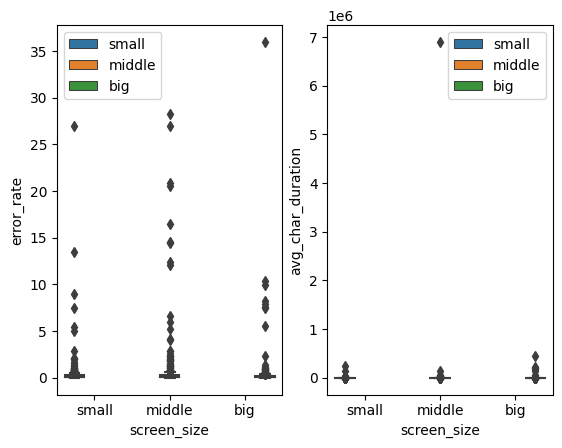

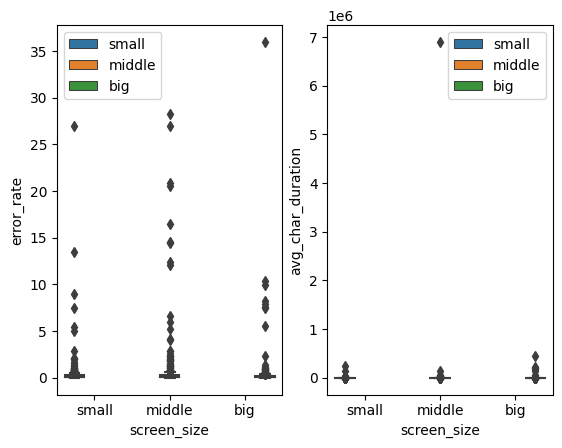

In [22]:

fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=merged_dataframe, x="screen_size", y="error_rate", hue=merged_dataframe.screen_size.tolist(), ax=axs[0])
sns.boxplot(data=merged_dataframe, x="screen_size", y="avg_char_duration", hue=merged_dataframe.screen_size.tolist(), ax=axs[1])
plt.show()

In [23]:

maov = MANOVA.from_formula('error_rate + avg_char_duration ~ screen_size', data=merged_dataframe)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9903 2.0000 1311.0000  6.4206 0.0017
         Pillai's trace 0.0097 2.0000 1311.0000  6.4206 0.0017
 Hotelling-Lawley trace 0.0098 2.0000 1311.0000  6.4206 0.0017
    Roy's greatest root 0.0098 2.0000 1311.0000  6.4206 0.0017
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
      screen_size       Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9942 4.0000 2622.0000  1.9007 0.1076
         Pillai's trace 0.0058 4.0000 2624.0000  1.8994 0.1078
 Hotelling-

***Statistical tests -- One-Way MANOVA on swipe finger***

-Notes: possible strange results due to outliers.

In [24]:
# summary statistics for dependent variable error_rate (swipe_finger)
merged_dataframe >> group_by(X.swipe_finger) >> summarize(n=X['error_rate'].count(), mean=X['error_rate'].mean(), std=X['error_rate'].std())

,swipe_finger,n,mean,std
0,Index,373,0.476510,2.058456
1,Other,74,0.332467,0.692388
2,Thumb,868,0.487229,2.322081


,swipe_finger,n,mean,std
0,Index,373,0.476510,2.058456
1,Other,74,0.332467,0.692388
2,Thumb,868,0.487229,2.322081


In [25]:
# summary statistics for dependent variable avg_char_duration (swipe_finger)
merged_dataframe >> group_by(X.screen_size) >> summarize(n=X['avg_char_duration'].count(), mean=X['avg_char_duration'].mean(), std=X['avg_char_duration'].std())

,screen_size,n,mean,std
0,big,438,3717.210635,28036.292584
1,middle,438,17228.671331,329788.645449
2,small,439,2071.697506,13013.695673


,screen_size,n,mean,std
0,big,438,3717.210635,28036.292584
1,middle,438,17228.671331,329788.645449
2,small,439,2071.697506,13013.695673


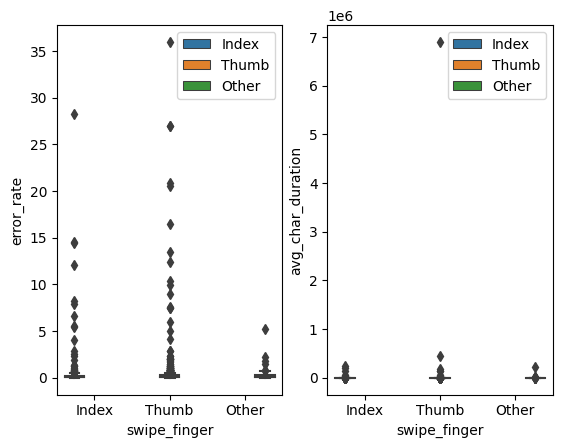

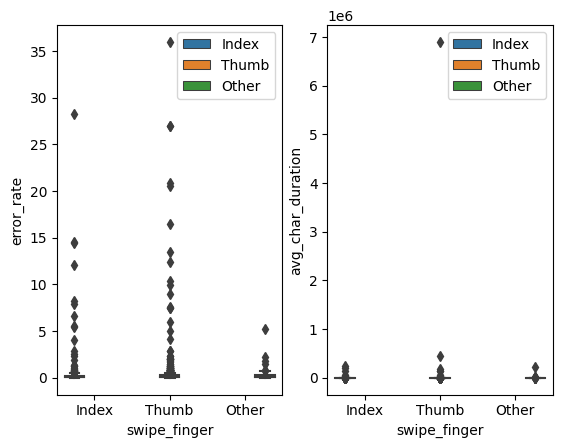

In [26]:

fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=merged_dataframe, x="swipe_finger", y="error_rate", hue=merged_dataframe.swipe_finger.tolist(), ax=axs[0])
sns.boxplot(data=merged_dataframe, x="swipe_finger", y="avg_char_duration", hue=merged_dataframe.swipe_finger.tolist(), ax=axs[1])
plt.show()

In [27]:
maov = MANOVA.from_formula('error_rate + avg_char_duration  ~ swipe_finger', data=merged_dataframe)

print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9866 2.0000 1311.0000  8.8743 0.0001
         Pillai's trace 0.0134 2.0000 1311.0000  8.8743 0.0001
 Hotelling-Lawley trace 0.0135 2.0000 1311.0000  8.8743 0.0001
    Roy's greatest root 0.0135 2.0000 1311.0000  8.8743 0.0001
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
      swipe_finger      Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9994 4.0000 2622.0000  0.1875 0.9450
         Pillai's trace 0.0006 4.0000 2624.0000  0.1876 0.9449
 Hotelling-

# ***Statistical Tests with outliers removed (using Inter Quartile Range)***

- note: Screen size outliers are not yet removed in this example because screen size is set to small, medium, big

In [28]:
# Function for removing outliers using Inter Quartile Range (IQR)
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
# Remove error_rate outliers using IQR
error_rate_outliers_removed = remove_outlier(merged_dataframe, 'error_rate')

In [30]:
# Remove avg_char_duration outliers using IQR
df_outliers_removed = remove_outlier(merged_dataframe, 'avg_char_duration')
print(df_outliers_removed)

      error_rate  avg_char_duration screen_size swipe_finger
0       0.119048         600.847024       small        Index
1       0.068966         563.154433       small        Thumb
2       0.102041         408.446876       small        Thumb
4       0.096774         313.006093       small        Thumb
5       0.017241         330.398804       small        Index
...          ...                ...         ...          ...
1310    0.111111         450.048311         big        Other
1311    0.049180         272.450742         big        Thumb
1312    0.633803         253.927487         big        Thumb
1313    0.359375         258.675978         big        Thumb
1314    0.272727         232.977971         big        Index

[1106 rows x 4 columns]
      error_rate  avg_char_duration screen_size swipe_finger
0       0.119048         600.847024       small        Index
1       0.068966         563.154433       small        Thumb
2       0.102041         408.446876       small        Thumb

- by removing outliers from error_rate and avg_char_duration there are 209 rows out of the 1315 rows removed from the dataframe

***One way MANOVA on swipe_finger***

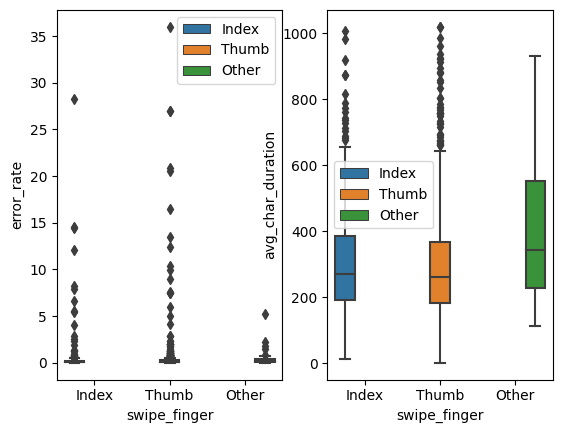

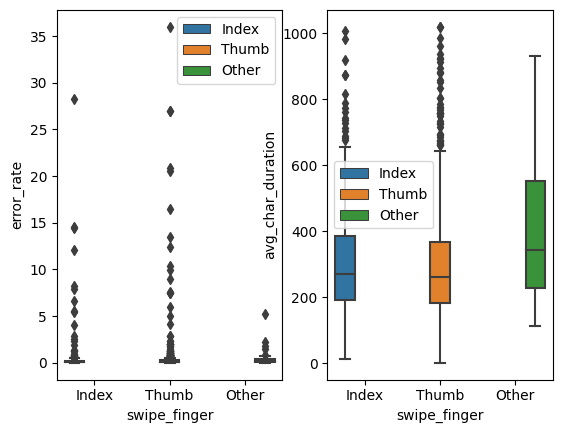

In [31]:
# plot to show distibution of error rate and avr_char_duration by swipe finger
# Note: error rate still look strange due to many big values diverging from means
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df_outliers_removed, x="swipe_finger", y="error_rate", hue=df_outliers_removed.swipe_finger.tolist(), ax=axs[0])
sns.boxplot(data=df_outliers_removed, x="swipe_finger", y="avg_char_duration", hue=df_outliers_removed.swipe_finger.tolist(), ax=axs[1])
plt.show()

In [32]:
# Perform One_Way MANOVA test on IV(swip_finger) and DVs (error_rate and avg_char_duration)
maov = MANOVA.from_formula('error_rate + avg_char_duration  ~ swipe_finger', data=df_outliers_removed)
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.5081 2.0000 1102.0000 533.3851 0.0000
         Pillai's trace 0.4919 2.0000 1102.0000 533.3851 0.0000
 Hotelling-Lawley trace 0.9680 2.0000 1102.0000 533.3851 0.0000
    Roy's greatest root 0.9680 2.0000 1102.0000 533.3851 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       swipe_finger      Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9820 4.0000 2204.0000  5.0222 0.0005
          Pillai's trace 0.0180 4.0000 2206.0000  5.0039 0.

***One way MANOVA on screen_size***

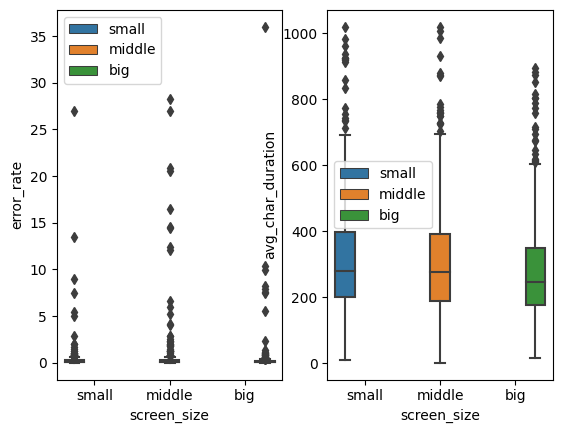

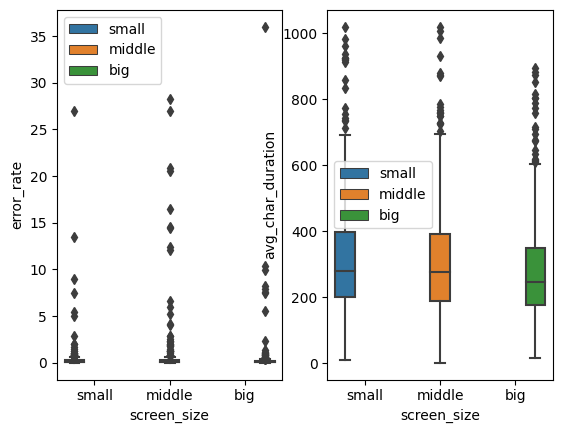

In [33]:
# plot to show distibution of error rate and avr_char_duration by screen size
# Note: error rate still look strange due to many big values diverging from means
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df_outliers_removed, x="screen_size", y="error_rate", hue=df_outliers_removed.screen_size.tolist(), ax=axs[0])
sns.boxplot(data=df_outliers_removed, x="screen_size", y="avg_char_duration", hue=df_outliers_removed.screen_size.tolist(), ax=axs[1])
plt.show()

In [34]:
# Perform One_Way MANOVA test on IV(screen_size) and DVs (error_rate and avg_char_duration)

maov = MANOVA.from_formula('error_rate + avg_char_duration  ~ screen_size', data=df_outliers_removed)
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.5117 2.0000 1102.0000 525.7796 0.0000
         Pillai's trace 0.4883 2.0000 1102.0000 525.7796 0.0000
 Hotelling-Lawley trace 0.9542 2.0000 1102.0000 525.7796 0.0000
    Roy's greatest root 0.9542 2.0000 1102.0000 525.7796 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       screen_size       Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9854 4.0000 2204.0000  4.0593 0.0028
          Pillai's trace 0.0146 4.0000 2206.0000  4.0588 0.

### ***2-FACTOR ANOVA USING STATSMODELS***

2-factor ANOVA on error_rate (-> to be significant PR < F) for examples see: https://www.pythonfordatascience.org/factorial-anova-python/

In [35]:
# significance for error rate 
model = ols("error_rate ~ C(screen_size, Sum) + C(swipe_finger, Sum) + C(screen_size, Sum):C(swipe_finger, Sum)", data=df_outliers_removed).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,90.238838,1.0,15.925386,0.000070
"C(screen_size, Sum)",19.035469,2.0,1.679694,0.186910
"C(swipe_finger, Sum)",1.925826,2.0,0.169935,0.843742
"C(screen_size, Sum):C(swipe_finger, Sum)",11.082184,4.0,0.488947,0.743883
Residual,6215.987597,1097.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Intercept,90.238838,1.0,15.925386,0.000070
"C(screen_size, Sum)",19.035469,2.0,1.679694,0.186910
"C(swipe_finger, Sum)",1.925826,2.0,0.169935,0.843742
"C(screen_size, Sum):C(swipe_finger, Sum)",11.082184,4.0,0.488947,0.743883
Residual,6215.987597,1097.0,NaN,NaN


The two-factor model was: error_rate ~ screen_size + swipe_finger + screen_size:swipe_finger 

- results show that there is a signficant effect of screen_size on error_rate
- results show that swipe_finger is statistically not significant
- results show that the 2-factor interaction is statistically not significant between screen_size and swipe_finger on error_rate

The 2 factor interaction is non-significant, it is removed from the model and the model is re-run. The reduced model will now be: error_rate ~ screen_size + swipe_finger

In [36]:
# significance for error rate 
model = ols("error_rate ~ C(screen_size, Sum) + C(swipe_finger, Sum)", data=df_outliers_removed).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,95.022783,1.0,16.800853,0.000045
"C(screen_size, Sum)",27.640958,2.0,2.443581,0.087320
"C(swipe_finger, Sum)",1.899816,2.0,0.167952,0.845416
Residual,6227.069781,1101.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Intercept,95.022783,1.0,16.800853,0.000045
"C(screen_size, Sum)",27.640958,2.0,2.443581,0.087320
"C(swipe_finger, Sum)",1.899816,2.0,0.167952,0.845416
Residual,6227.069781,1101.0,NaN,NaN


- the effect of screen_size on error_rate is statistically significant
- the effect of swipe_finger on error_rate is statistically not significant 

***2-factor ANOVA on avg_char_duration (-> to be significant PR < F)***

In [37]:
# significance for avg_char_duration
model = ols("avg_char_duration ~ C(screen_size, Sum) + C(swipe_finger, Sum) + C(screen_size, Sum):C(swipe_finger, Sum)", data=df_outliers_removed).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,4.713513e+07,1.0,1577.711302,1.541831e-214
"C(screen_size, Sum)",3.733931e+05,2.0,6.249124,2.001629e-03
"C(swipe_finger, Sum)",6.740018e+05,2.0,11.280125,1.415135e-05
"C(screen_size, Sum):C(swipe_finger, Sum)",1.802702e+05,4.0,1.508505,1.974397e-01
Residual,3.277357e+07,1097.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Intercept,4.713513e+07,1.0,1577.711302,1.541831e-214
"C(screen_size, Sum)",3.733931e+05,2.0,6.249124,2.001629e-03
"C(swipe_finger, Sum)",6.740018e+05,2.0,11.280125,1.415135e-05
"C(screen_size, Sum):C(swipe_finger, Sum)",1.802702e+05,4.0,1.508505,1.974397e-01
Residual,3.277357e+07,1097.0,NaN,NaN


The two-factor model was: avg_char_duration ~ screen_size + swipe_finger + screen_size:swipe_finger 

- results show that there is a signficant effect of screen size on avg_char_duration
- results show that swipe finger is statistically significant on avg_char_duration
- results show that the 2-factor interaction is statistically insignificant between screen size and swipe finger on avg_char_duration

The 2 factor interaction is non-significant, it is removed from the model and the model is re-run. The reduced model will now be: avg_char_duration ~ screen_size + swipe_finger

In [38]:
# significance for avg_char_duration
model = ols("avg_char_duration ~ C(screen_size, Sum) + C(swipe_finger, Sum)", data=df_outliers_removed).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,4.864803e+07,1.0,1625.348784,5.120935e-219
"C(screen_size, Sum)",3.595527e+05,2.0,6.006395,2.544391e-03
"C(swipe_finger, Sum)",6.495444e+05,2.0,10.850759,2.154847e-05
Residual,3.295384e+07,1101.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Intercept,4.864803e+07,1.0,1625.348784,5.120935e-219
"C(screen_size, Sum)",3.595527e+05,2.0,6.006395,2.544391e-03
"C(swipe_finger, Sum)",6.495444e+05,2.0,10.850759,2.154847e-05
Residual,3.295384e+07,1101.0,NaN,NaN


- the effect of screen_size on avg_char_duration is statistically significant
- the effect of swipe_finger on avg_char_duration is statistically significant 